In [46]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Reading the data
train = pd.read_csv("Roy_DT_Train.csv")

In [48]:
print(train.head())

      ID Gender State    Zip  Zip3  Weeks Since First Purchase  \
0  25890      F    NY  11365   113                          49   
1  36329      F    MD  20769   207                          39   
2  34401      F    NY  11787   117                          65   
3  31197      F    MA   1701    17                          61   
4  48545      M    DC  20019   200                          35   

   Weeks Since Last Purchase  Book Purchase ($)  Nonbook Purchase($)  \
0                          1                141                  335   
1                          1                146                  329   
2                          1                131                  337   
3                          1                142                  322   
4                          1                143                  318   

   Total Purchase ($)  No. of Purchases  No. of Childbook Purchases  \
0                 476                12                           2   
1                 475       

In [49]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29987 entries, 0 to 29986
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              29987 non-null  int64 
 1   Gender                          29987 non-null  object
 2   State                           29987 non-null  object
 3   Zip                             29987 non-null  int64 
 4   Zip3                            29987 non-null  int64 
 5   Weeks Since First Purchase      29987 non-null  int64 
 6   Weeks Since Last Purchase       29987 non-null  int64 
 7   Book Purchase ($)               29987 non-null  int64 
 8   Nonbook Purchase($)             29987 non-null  int64 
 9   Total Purchase ($)              29987 non-null  int64 
 10  No. of Purchases                29987 non-null  int64 
 11  No. of Childbook Purchases      29987 non-null  int64 
 12  No. of Youthbook Purchases      29987 non-null

In [50]:
print(train.describe())

                 ID           Zip          Zip3  Weeks Since First Purchase  \
count  29987.000000  29987.000000  29987.000000                29987.000000   
mean   35016.216294  11569.854804    115.312235                   25.555241   
std    14433.300009   5634.171318     56.378292                   18.312238   
min    10001.000000    801.000000      8.000000                    1.000000   
25%    22531.500000   7646.000000     76.000000                   11.000000   
50%    35004.000000  11210.000000    112.000000                   19.000000   
75%    47469.500000  16509.000000    165.000000                   35.000000   
max    59999.000000  21244.000000    212.000000                   99.000000   

       Weeks Since Last Purchase  Book Purchase ($)  Nonbook Purchase($)  \
count               29987.000000       29987.000000         29987.000000   
mean                   12.312702          46.598493           161.598359   
std                     8.125079          37.964235         

In [51]:
print(train.isna().sum())

ID                                0
Gender                            0
State                             0
Zip                               0
Zip3                              0
Weeks Since First Purchase        0
Weeks Since Last Purchase         0
Book Purchase ($)                 0
Nonbook Purchase($)               0
Total Purchase ($)                0
No. of Purchases                  0
No. of Childbook Purchases        0
No. of Youthbook Purchases        0
No. of Cookbook Purchases         0
No. of Do It Purchases            0
No. of Referncebook Purchases     0
No. of Artbook Purchases          0
No. of Geographybook Purchases    0
Response                          0
dtype: int64


In [52]:
# Drop identifier column
train = train.drop(['ID'], axis=1)

In [53]:
# Drop Demographic Info
train = train.drop(['State', 'Zip', 'Zip3'], axis=1)

In [54]:
# Count the occurrences of each class
class_counts = train['Response'].value_counts()

# Calculate the prior probabilities
prior_probabilities = class_counts / len(train)

# Display the prior probabilities
print(prior_probabilities)


No     0.910461
Yes    0.089539
Name: Response, dtype: float64


In [56]:
train["Gender"] = train.Gender.map({"M": 0, "F": 1})

In [57]:
train.head()

,Gender,Weeks Since First Purchase,Weeks Since Last Purchase,Book Purchase ($),Nonbook Purchase($),Total Purchase ($),No. of Purchases,No. of Childbook Purchases,No. of Youthbook Purchases,No. of Cookbook Purchases,No. of Do It Purchases,No. of Referncebook Purchases,No. of Artbook Purchases,No. of Geographybook Purchases,Response
0,1,49,1,141,335,476,12,2,0,4,1,1,0,4,Yes
1,1,39,1,146,329,475,12,1,1,2,0,2,1,5,Yes
2,1,65,1,131,337,468,12,2,2,4,1,0,1,2,No
3,1,61,1,142,322,464,12,2,1,0,3,1,2,3,Yes
4,0,35,1,143,318,461,12,1,0,3,2,0,2,4,Yes


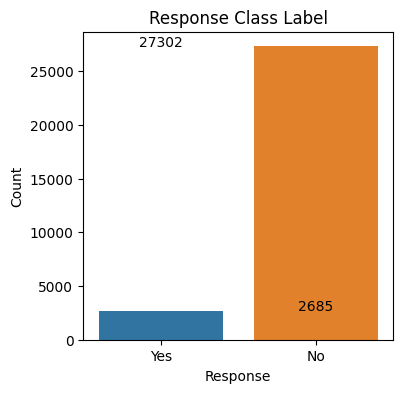

No     27302
Yes     2685
Name: Response, dtype: int64


In [58]:
# Visualize the each class label category,'Response' in train
class_distribution = train['Response'].value_counts()
# Plot the class distribution
plt.figure(figsize=(4, 4))
sns.countplot(x='Response', data=train)
plt.title('Response Class Label')
plt.xlabel('Response')
plt.ylabel('Count')
# Display values on top of the bars
for p in range(len(class_distribution)):
    plt.text(p, class_distribution[p], class_distribution[p], ha='center')
# Show the chart
plt.show()
# Print the class distribution
print(class_distribution)

<ipython-input-59-a7eefa01a1d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train [train['Response'] == 'Yes']['Weeks Since Last Purchase'], label='Yes')
<ipython-input-59-a7eefa01a1d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train [train[ 'Response']=='No']['Weeks Since Last Purch

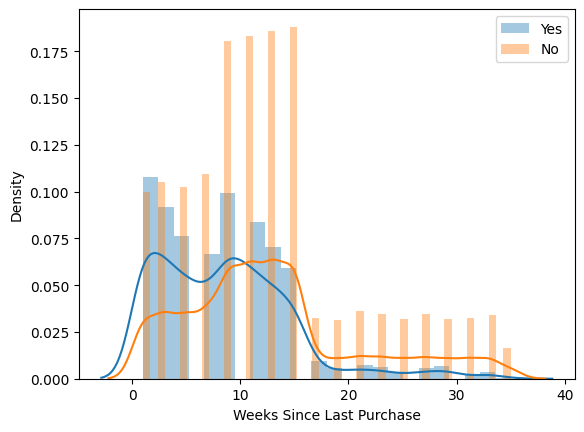

In [59]:
#Visualize the distribution of word counts in each category using displot
sns.distplot(train [train['Response'] == 'Yes']['Weeks Since Last Purchase'], label='Yes')
sns.distplot(train [train[ 'Response']=='No']['Weeks Since Last Purchase'], label='No')
plt.legend()
plt.show()

In [91]:
# compute mean value of total purchase with respect to Response: May use sum(), count() or mean()
train[["Total Purchase ($)", "Weeks Since Last Purchase"]].groupby(['Weeks Since Last Purchase'],
        as_index=False).mean().sort_values (by='Weeks Since Last Purchase', ascending=False)

,Weeks Since Last Purchase,Total Purchase ($)
17,35,211.603226
16,33,205.513932
15,31,206.683524
14,29,215.985460
13,27,212.377074
12,25,211.354305
11,23,203.061103
10,21,204.492132
9,19,208.540496
8,17,202.148265


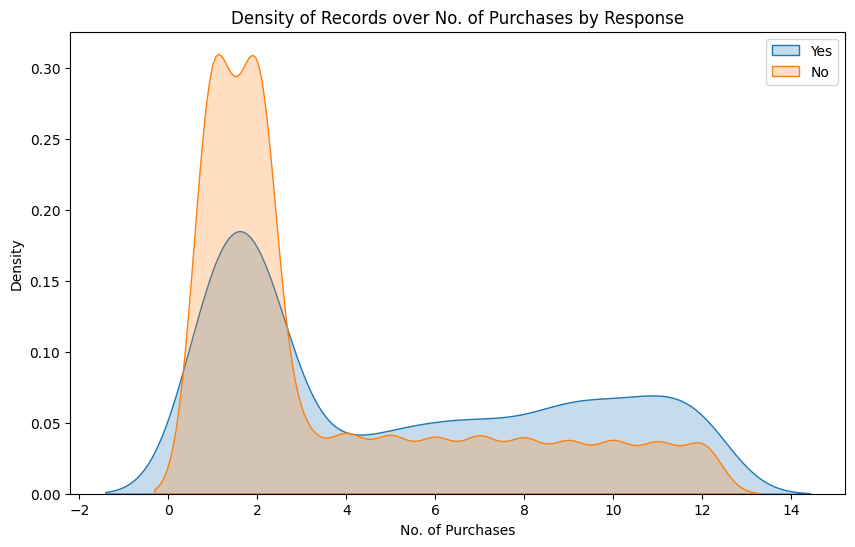

In [61]:
# Frequency Analysis

# Filter the data for 'Yes' and 'No' responses
yes_data = train[train['Response'] == 'Yes']
no_data = train[train['Response'] == 'No']

# Create density distribution plots for 'No. of Purchases' for 'Yes' and 'No' responses
plt.figure(figsize=(10, 6))  # Set the figure size

sns.kdeplot(yes_data['No. of Purchases'], label='Yes', fill=True)  # Density plot for 'Yes' response
sns.kdeplot(no_data['No. of Purchases'], label='No', fill=True)  # Density plot for 'No' response

# Labeling and legend
plt.title('Density of Records over No. of Purchases by Response')
plt.xlabel('No. of Purchases')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [92]:
# compute mean value of total purchase with respect to Response: May use sum(), count() or mean()
train[["Total Purchase ($)", "No. of Purchases"]].groupby(['No. of Purchases'],
as_index=False).mean().sort_values (by= 'No. of Purchases', ascending=False)

,No. of Purchases,Total Purchase ($)
11,12,331.989140
10,11,315.173010
9,10,296.976027
8,9,285.139574
7,8,269.532313
6,7,256.590538
5,6,237.248735
4,5,225.821725
3,4,209.401478
2,3,196.706911


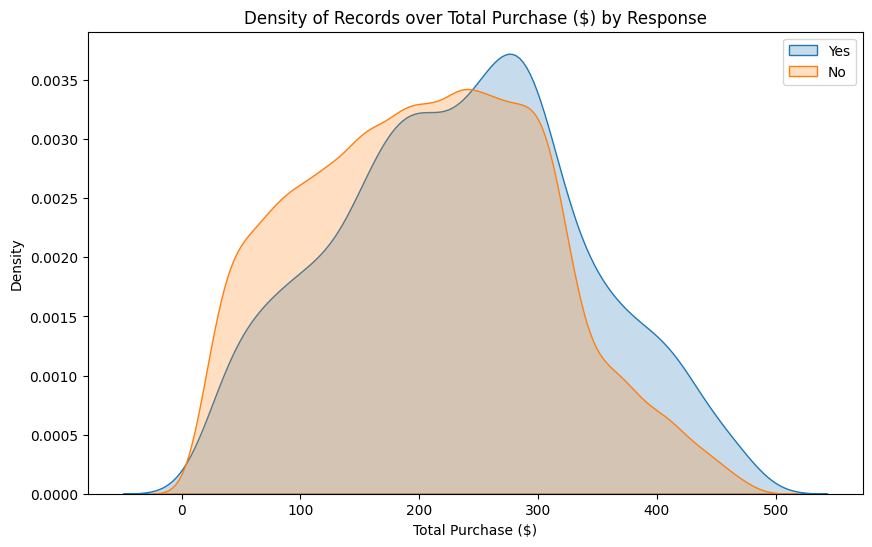

In [63]:
# Monetary Analysis

# Filter the data for 'Yes' and 'No' responses
yes_data = train[train['Response'] == 'Yes']
no_data = train[train['Response'] == 'No']

# Create density distribution plots for 'Total Purchase ($)' for 'Yes' and 'No' responses
plt.figure(figsize=(10, 6))  # Set the figure size

sns.kdeplot(yes_data['Total Purchase ($)'], label='Yes', fill=True)  # Density plot for 'Yes' response
sns.kdeplot(no_data['Total Purchase ($)'], label='No', fill=True)  # Density plot for 'No' response

# Labeling and legend
plt.title('Density of Records over Total Purchase ($) by Response')
plt.xlabel('Total Purchase ($)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [64]:
#compute mean value of total purchase with respect to Response: May use
train[["Total Purchase ($)", "Response"]].groupby(['Response'],
as_index=False).mean().sort_values (by='Response', ascending=False)

,Response,Total Purchase ($)
1,Yes,235.009683
0,No,205.559959


In [65]:
X = train.drop(["Response"], axis=1)  # independent variables after droping class variable from the dataframe
y = train.Response # Target variable

In [66]:
# Split our data into training (70%) and test sets (30%) usiing train_test_split()
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [67]:
# Check X_train after transformation and split using info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20990 entries, 24974 to 23755
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          20990 non-null  int64
 1   Weeks Since First Purchase      20990 non-null  int64
 2   Weeks Since Last Purchase       20990 non-null  int64
 3   Book Purchase ($)               20990 non-null  int64
 4   Nonbook Purchase($)             20990 non-null  int64
 5   Total Purchase ($)              20990 non-null  int64
 6   No. of Purchases                20990 non-null  int64
 7   No. of Childbook Purchases      20990 non-null  int64
 8   No. of Youthbook Purchases      20990 non-null  int64
 9   No. of Cookbook Purchases       20990 non-null  int64
 10  No. of Do It Purchases          20990 non-null  int64
 11  No. of Referncebook Purchases   20990 non-null  int64
 12  No. of Artbook Purchases        20990 non-null  int64
 1

In [68]:
# Initialize the Decision Tree Classifier and fit the data.
# Include library
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Initialize our Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train our Decision Tree Classifier
model = dt.fit(X_train, y_train)

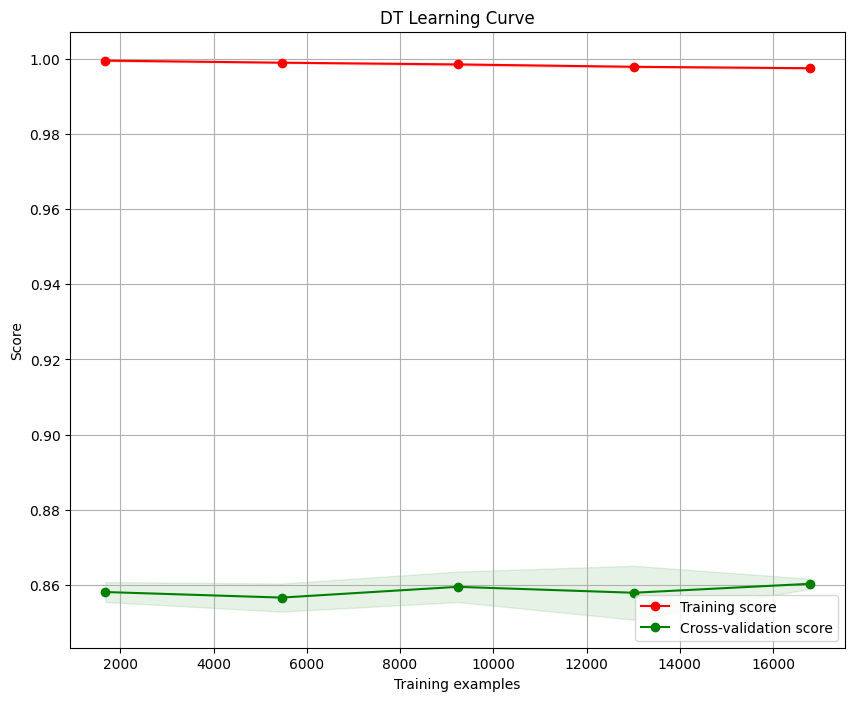

In [69]:
# learning curve of a DT classifier
import matplotlib.pyplot as plt

%pip install scikit-plot
import scikitplot as skplt

skplt.estimators.plot_learning_curve(dt,X_train, y_train, title="DT Learning Curve", cv=5, figsize=(10, 8))
plt.show()

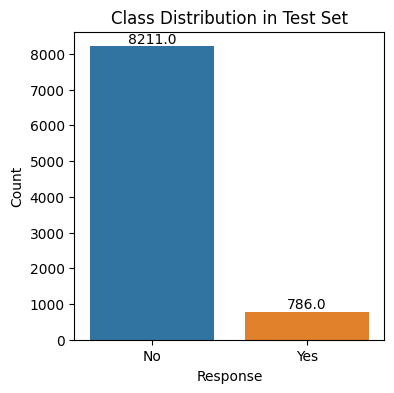

No     8211
Yes     786
Name: Response, dtype: int64


In [70]:
# Calculate class distribution in the test set
class_distribution_test = y_test.value_counts()

# Create a bar chart to visualize the class distribution
plt.figure(figsize=(4, 4))
sns.barplot(x=class_distribution_test.index, y=class_distribution_test.values)
plt.title('Class Distribution in Test Set')
plt.xlabel('Response')
plt.ylabel('Count')

# Annotate the bars with values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', size=10)

plt.show()
# Print the class distribution for test set
print(class_distribution_test)

In [71]:
# Save the prediction on the test set from the model into "predicted" list
predicted = model.predict(X_test)

# you may want to see the prediction
print(predicted)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [72]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8571746137601423


In [73]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[7529  682]
 [ 603  183]]


In [74]:
# Classification Report
from sklearn.metrics import classification_report

print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

          No       0.93      0.92      0.92      8211
         Yes       0.21      0.23      0.22       786

    accuracy                           0.86      8997
   macro avg       0.57      0.57      0.57      8997
weighted avg       0.86      0.86      0.86      8997



In [75]:
# Save the predicted probability from the model into predicted_probas
predicted_probas = model.predict_proba(X_test)

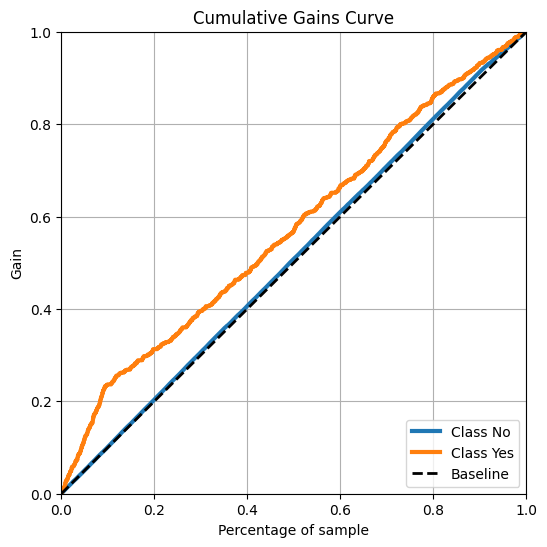

In [76]:
# Show cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(6, 6))
plt.show()

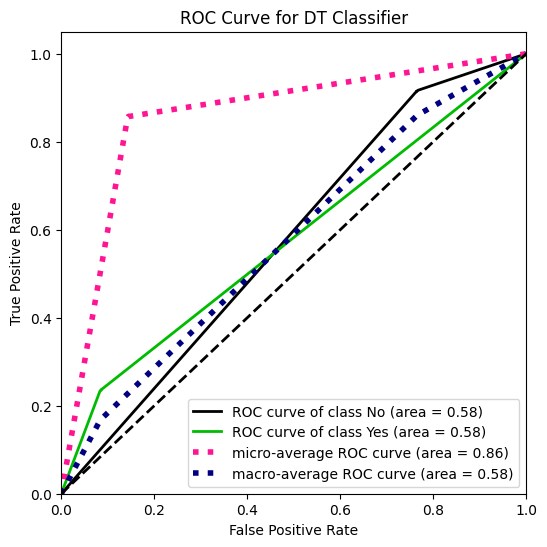

In [77]:
# ROC Curve
skplt.metrics.plot_roc(y_true=y_test, y_probas=predicted_probas, figsize=(6, 6), title="ROC Curve for DT Classifier")
plt.show()

Text(0.5, 0, 'Decision Tree Feature Importance')

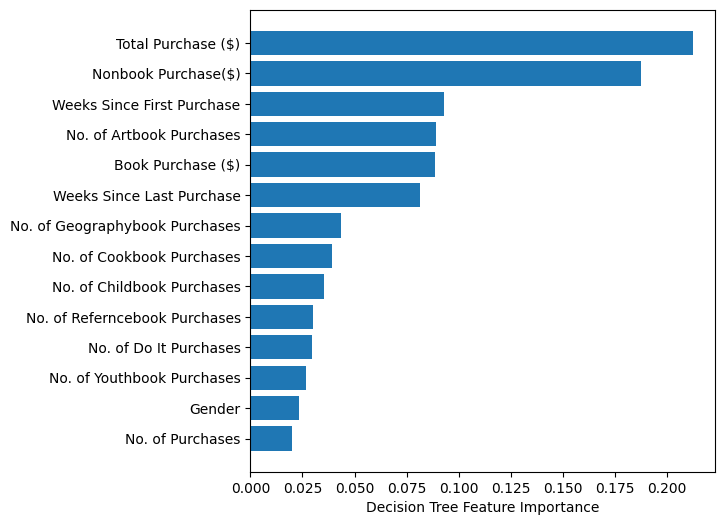

In [78]:
# feature importances chart
sorted_idx= dt.feature_importances_.argsort()
fig, ax = plt.subplots(1, figsize = (6,6))
plt.barh(train.columns.values[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [79]:
# Generates a DT model score, R^2, on the train set
dt.score(X_train, y_train)

0.9970462124821343

In [80]:
# Permutation_importance()
from sklearn.inspection import permutation_importance
imps = permutation_importance(dt, X_train, y_train, random_state=42)

# print the mean value of permutation importances score (importances_mean) for each column
print(imps.importances_mean)

[0.05780848 0.08323964 0.11916151 0.06770843 0.14313483 0.14905193
 0.03091949 0.03723678 0.0204383  0.04004764 0.02548833 0.02033349
 0.10105765 0.07483564]


In [81]:
# Sort and print permutation_importance() for each column
#------------------------------------------------------------------------------------------------------------------------
sorted_col = []

# sort columns index in descending order based on the mean value of permutation importances score
for i in imps.importances_mean.argsort()[::-1]:
#    if imps.importances_mean[i] - 2 * imps.importances_std[i] > 0:
            # append column names (columns.values) to sorted_col
            sorted_col.append(X_train.columns.values[i])
            # print out column names (columns.values) followed by mean value of permutation importances score
            print(f"{X_train.columns.values[i]: <20}" f": " f"{imps.importances_mean[i]:.3f}")

Total Purchase ($)  : 0.149
Nonbook Purchase($) : 0.143
Weeks Since Last Purchase: 0.119
No. of Artbook Purchases: 0.101
Weeks Since First Purchase: 0.083
No. of Geographybook Purchases: 0.075
Book Purchase ($)   : 0.068
Gender              : 0.058
No. of Cookbook Purchases: 0.040
No. of Childbook Purchases: 0.037
No. of Purchases    : 0.031
No. of Do It Purchases: 0.025
No. of Youthbook Purchases: 0.020
No. of Referncebook Purchases: 0.020


Text(0.5, 0, 'Permutation Importance')

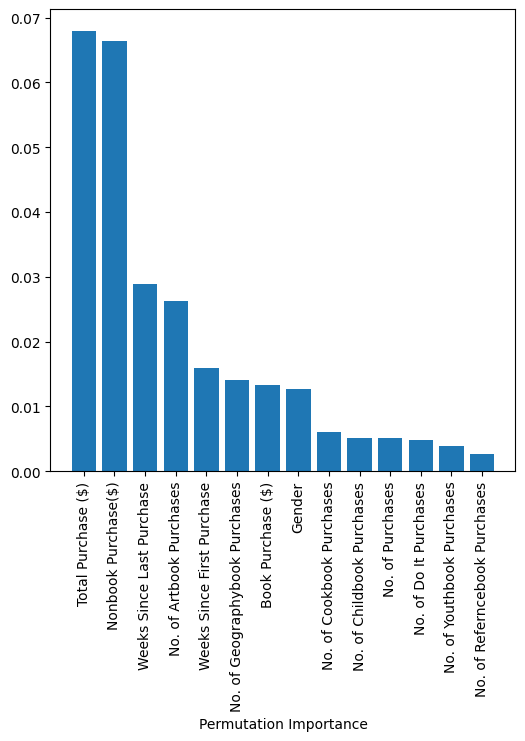

In [82]:
# Permutation importances vertical bar chart
perm_importance = permutation_importance(dt, X_test, y_test) # may also use test sets
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
f, ax = plt.subplots(figsize=(6,6)) # set the size that you'd like (width, height)
plt.bar(X_test.columns.values[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xticks(range(X_test.shape[1]), sorted_col, rotation=90)
plt.xlabel("Permutation Importance")

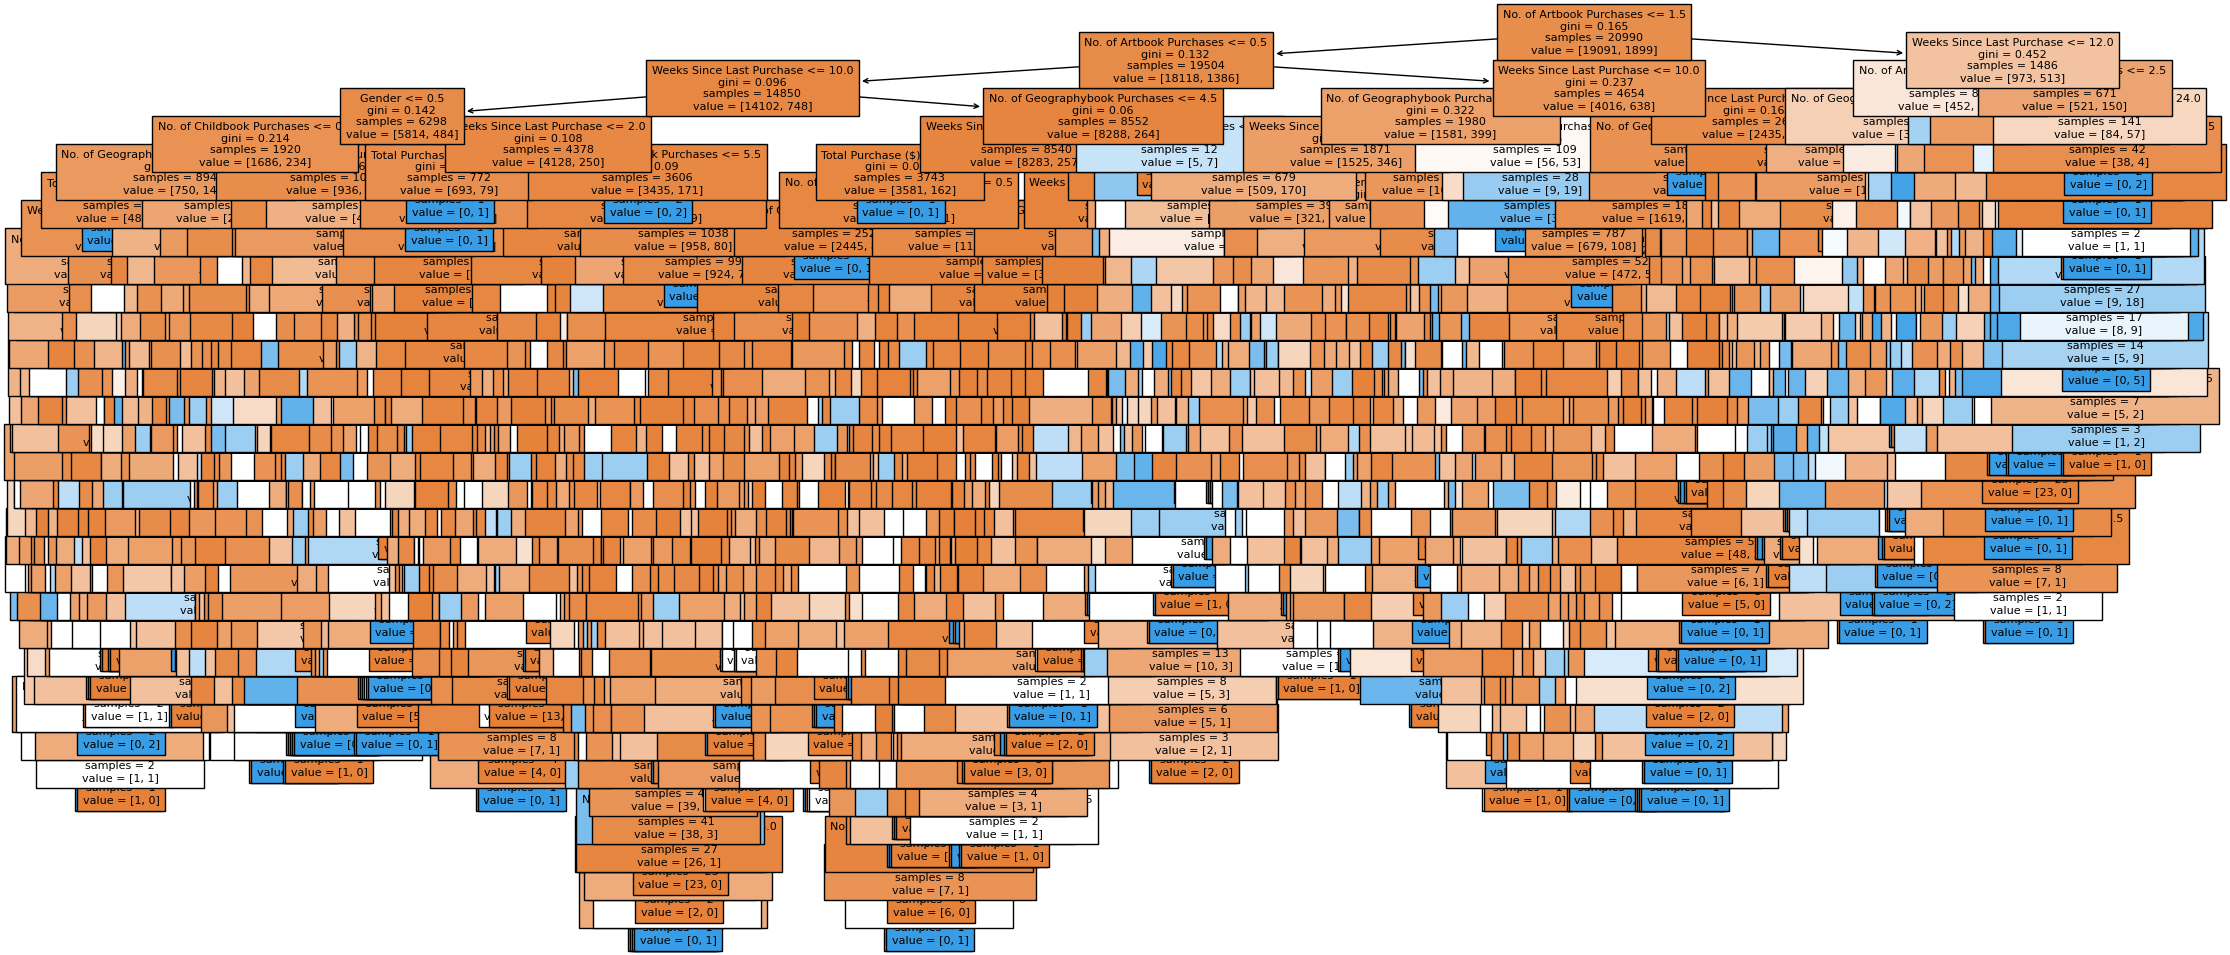

In [83]:
# Import necessary libraries
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 12))

# Visualize the Decision Tree with attribute names
tree.plot_tree(dt, filled=True, fontsize=8, feature_names=["Gender", "Weeks Since First Purchase", "Weeks Since Last Purchase", "Book Purchase ($)", "Nonbook Purchase($)", "Total Purchase ($)", "No. of Purchases", "No. of Childbook Purchases", "No. of Youthbook Purchases", "No. of Cookbook Purchases", "No. of Do It Purchases", "No. of Referncebook Purchases", "No. of Artbook Purchases", "No. of Geographybook Purchases"])

# Show the plot
plt.show()


In [84]:
# Improve the Model with Grid Search
# Import library
from pprint import pprint
# Look at parameters used with get_params()
print("Parameters currently in use:\n")
pprint(dt.get_params)

Parameters currently in use:

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>


In [85]:
# Create the parameter grid based on the results of random search
from sklearn.model_selection import GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"], # metric to evaluate the importance of each variable
    "max_depth": [2, 4, 6, 8], # max number of levels in each decision tree
    "min_samples_leaf": [3, 4, 5], # min number of data points allowed in a leaf node
    "min_samples_split": [6, 8, 10] # min number of data points placed in a node before the node is split
}

In [86]:
# Instantiate the grid search model and fit it to the data. Finally, print out the best parameters
# Instantiate the grid search object, grid_search, with GridSearchCV()
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)

# Fit the grid search to the data with fit() of grid search object
grid_search.fit(X_train, y_train)

# Print out the best parameters using best_params_ of grid search object
grid_search.best_params_   # build the best model based on grid search outputs

Fitting 2 folds for each of 72 candidates, totalling 144 fits


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [87]:
# Build and train a decision tree with the best parameters
dt = DecisionTreeClassifier(**grid_search.best_params_)

# train a decision tree object
dt.fit(X_train, y_train)

# save the prediction on X_train and X-test from the model into predicted list
train_pred =  dt.predict(X_train)
predicted =  dt.predict(X_test)

In [88]:
# Use classification_report() to print out precision, recall, f1-score, support and accuracy
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      8211
         Yes       0.63      0.08      0.14       786

    accuracy                           0.92      8997
   macro avg       0.77      0.54      0.55      8997
weighted avg       0.89      0.92      0.88      8997



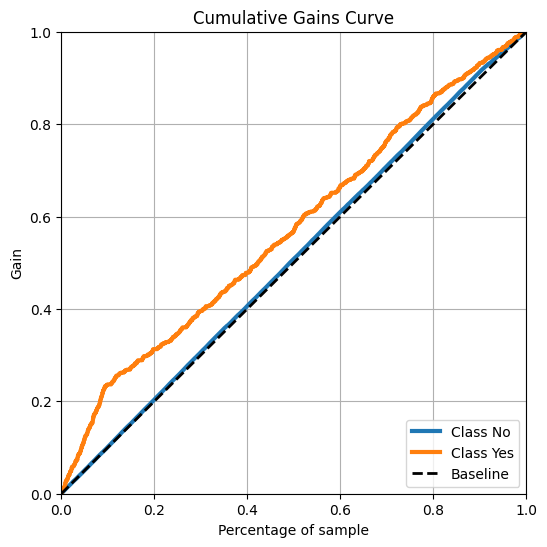

In [89]:
## Cumulative Gain Chart
predicted_probas = model.predict_proba(X_test)
# Show cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=predicted_probas, figsize=(6, 6))
plt.show()

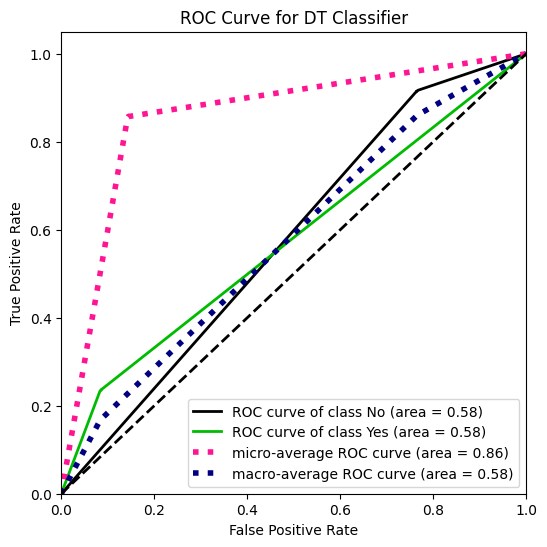

In [90]:
# ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=predicted_probas, figsize=(6, 6), title="ROC Curve for DT Classifier")
plt.show()